In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv(r"C:\Users\DELL XPS\Desktop\skillenable\ML\HousingData.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Data sourced from UCLA, dpwnloaded from kaggle
Data feature overview:


CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town
CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - Pupil-techer ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - percent lower status of the population
MEDV (TARGET) - Median value of owner-occupied homes in 1000's



C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_21232\23715988.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  MEDV = sns.distplot(data['MEDV'])


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

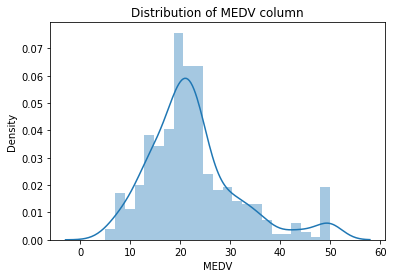

In [6]:
MEDV = sns.distplot(data['MEDV'])
MEDV.set(title = "Distribution of MEDV column")
data['MEDV'].describe()

In [7]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

12


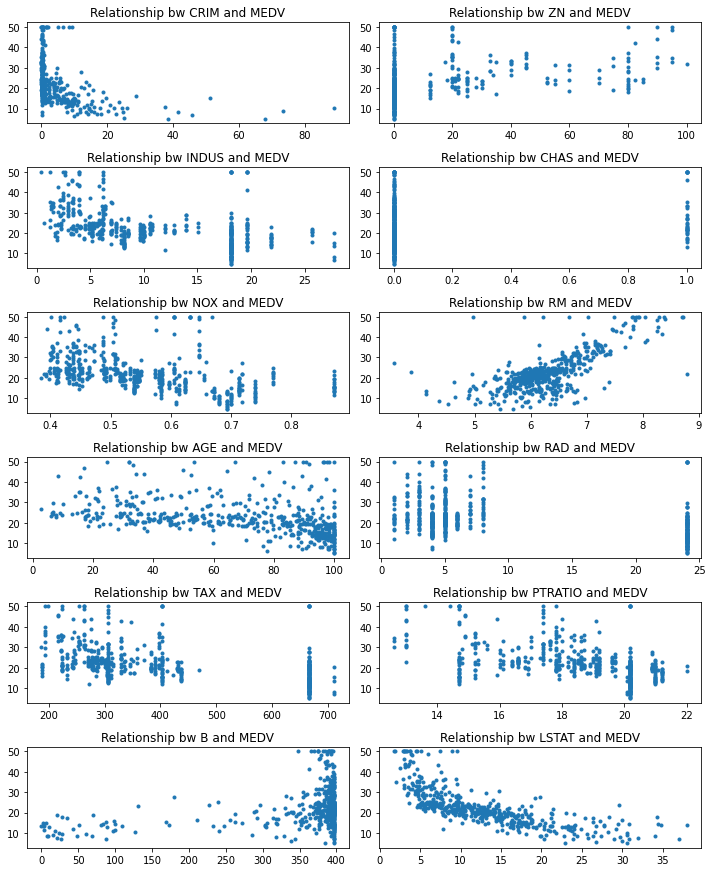

In [12]:
plt.figure(figsize=(10, 14))
title="Relationship bw %s and MEDV"
i = 0
print(len(colnames))
for col in colnames:
    i+=1
    plt.subplot(7,2,i)
    plt.plot(data[col],data["MEDV"],marker='.',linestyle='none')
    
    plt.title(title % (col))
    plt.tight_layout()

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(394, 14)

TAX column has a majority of its values in the 200-400 range but there are a collection of homes that have a TAX value of above 600
RAD column has most of its values between 0-10 but there is a collection of values over 20.
Many of the columns are heavily skewed left or right. For example, the ZN column is heavily skewed right.
The code below will explore each observation.

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_21232\4096901892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data[column], ax=ax[row][col])
C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_21232\4096901892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data[column], ax=ax[row][

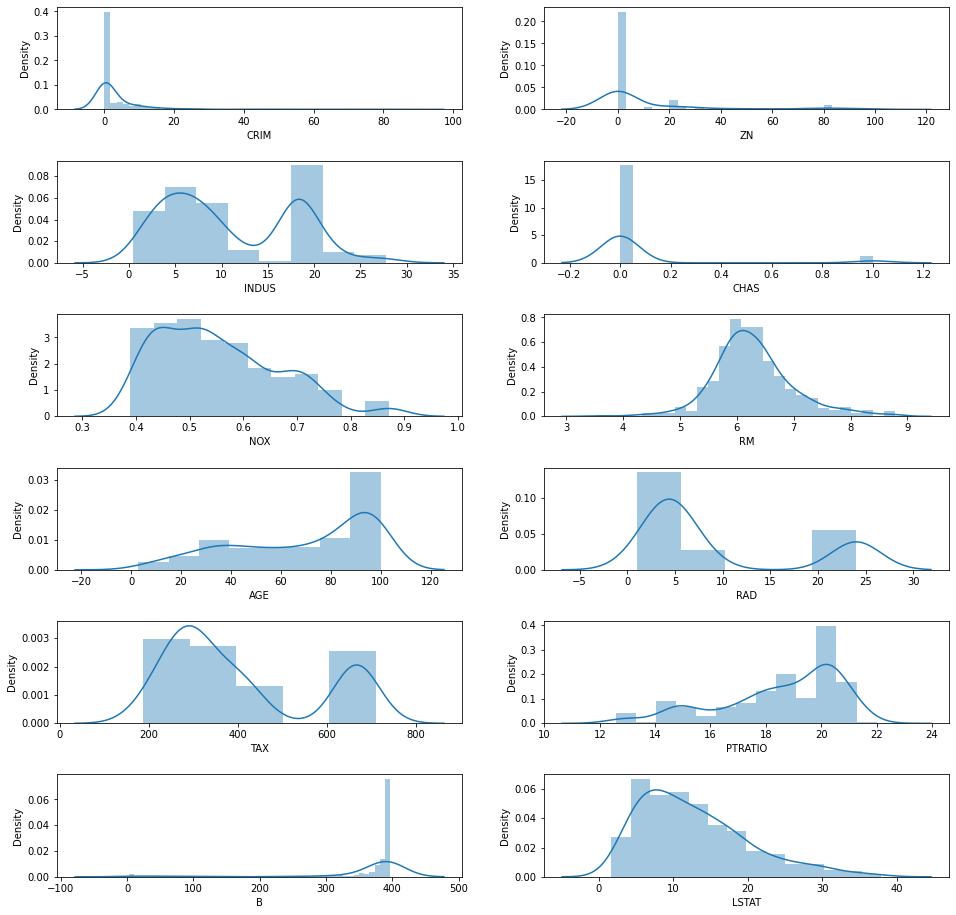

In [20]:
f, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(16,16))
#columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       #'PTRATIO', 'B', 'LSTAT']
row = 0
col = 0
for i, column in enumerate(colnames):
    g = sns.distplot(data[column], ax=ax[row][col])
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

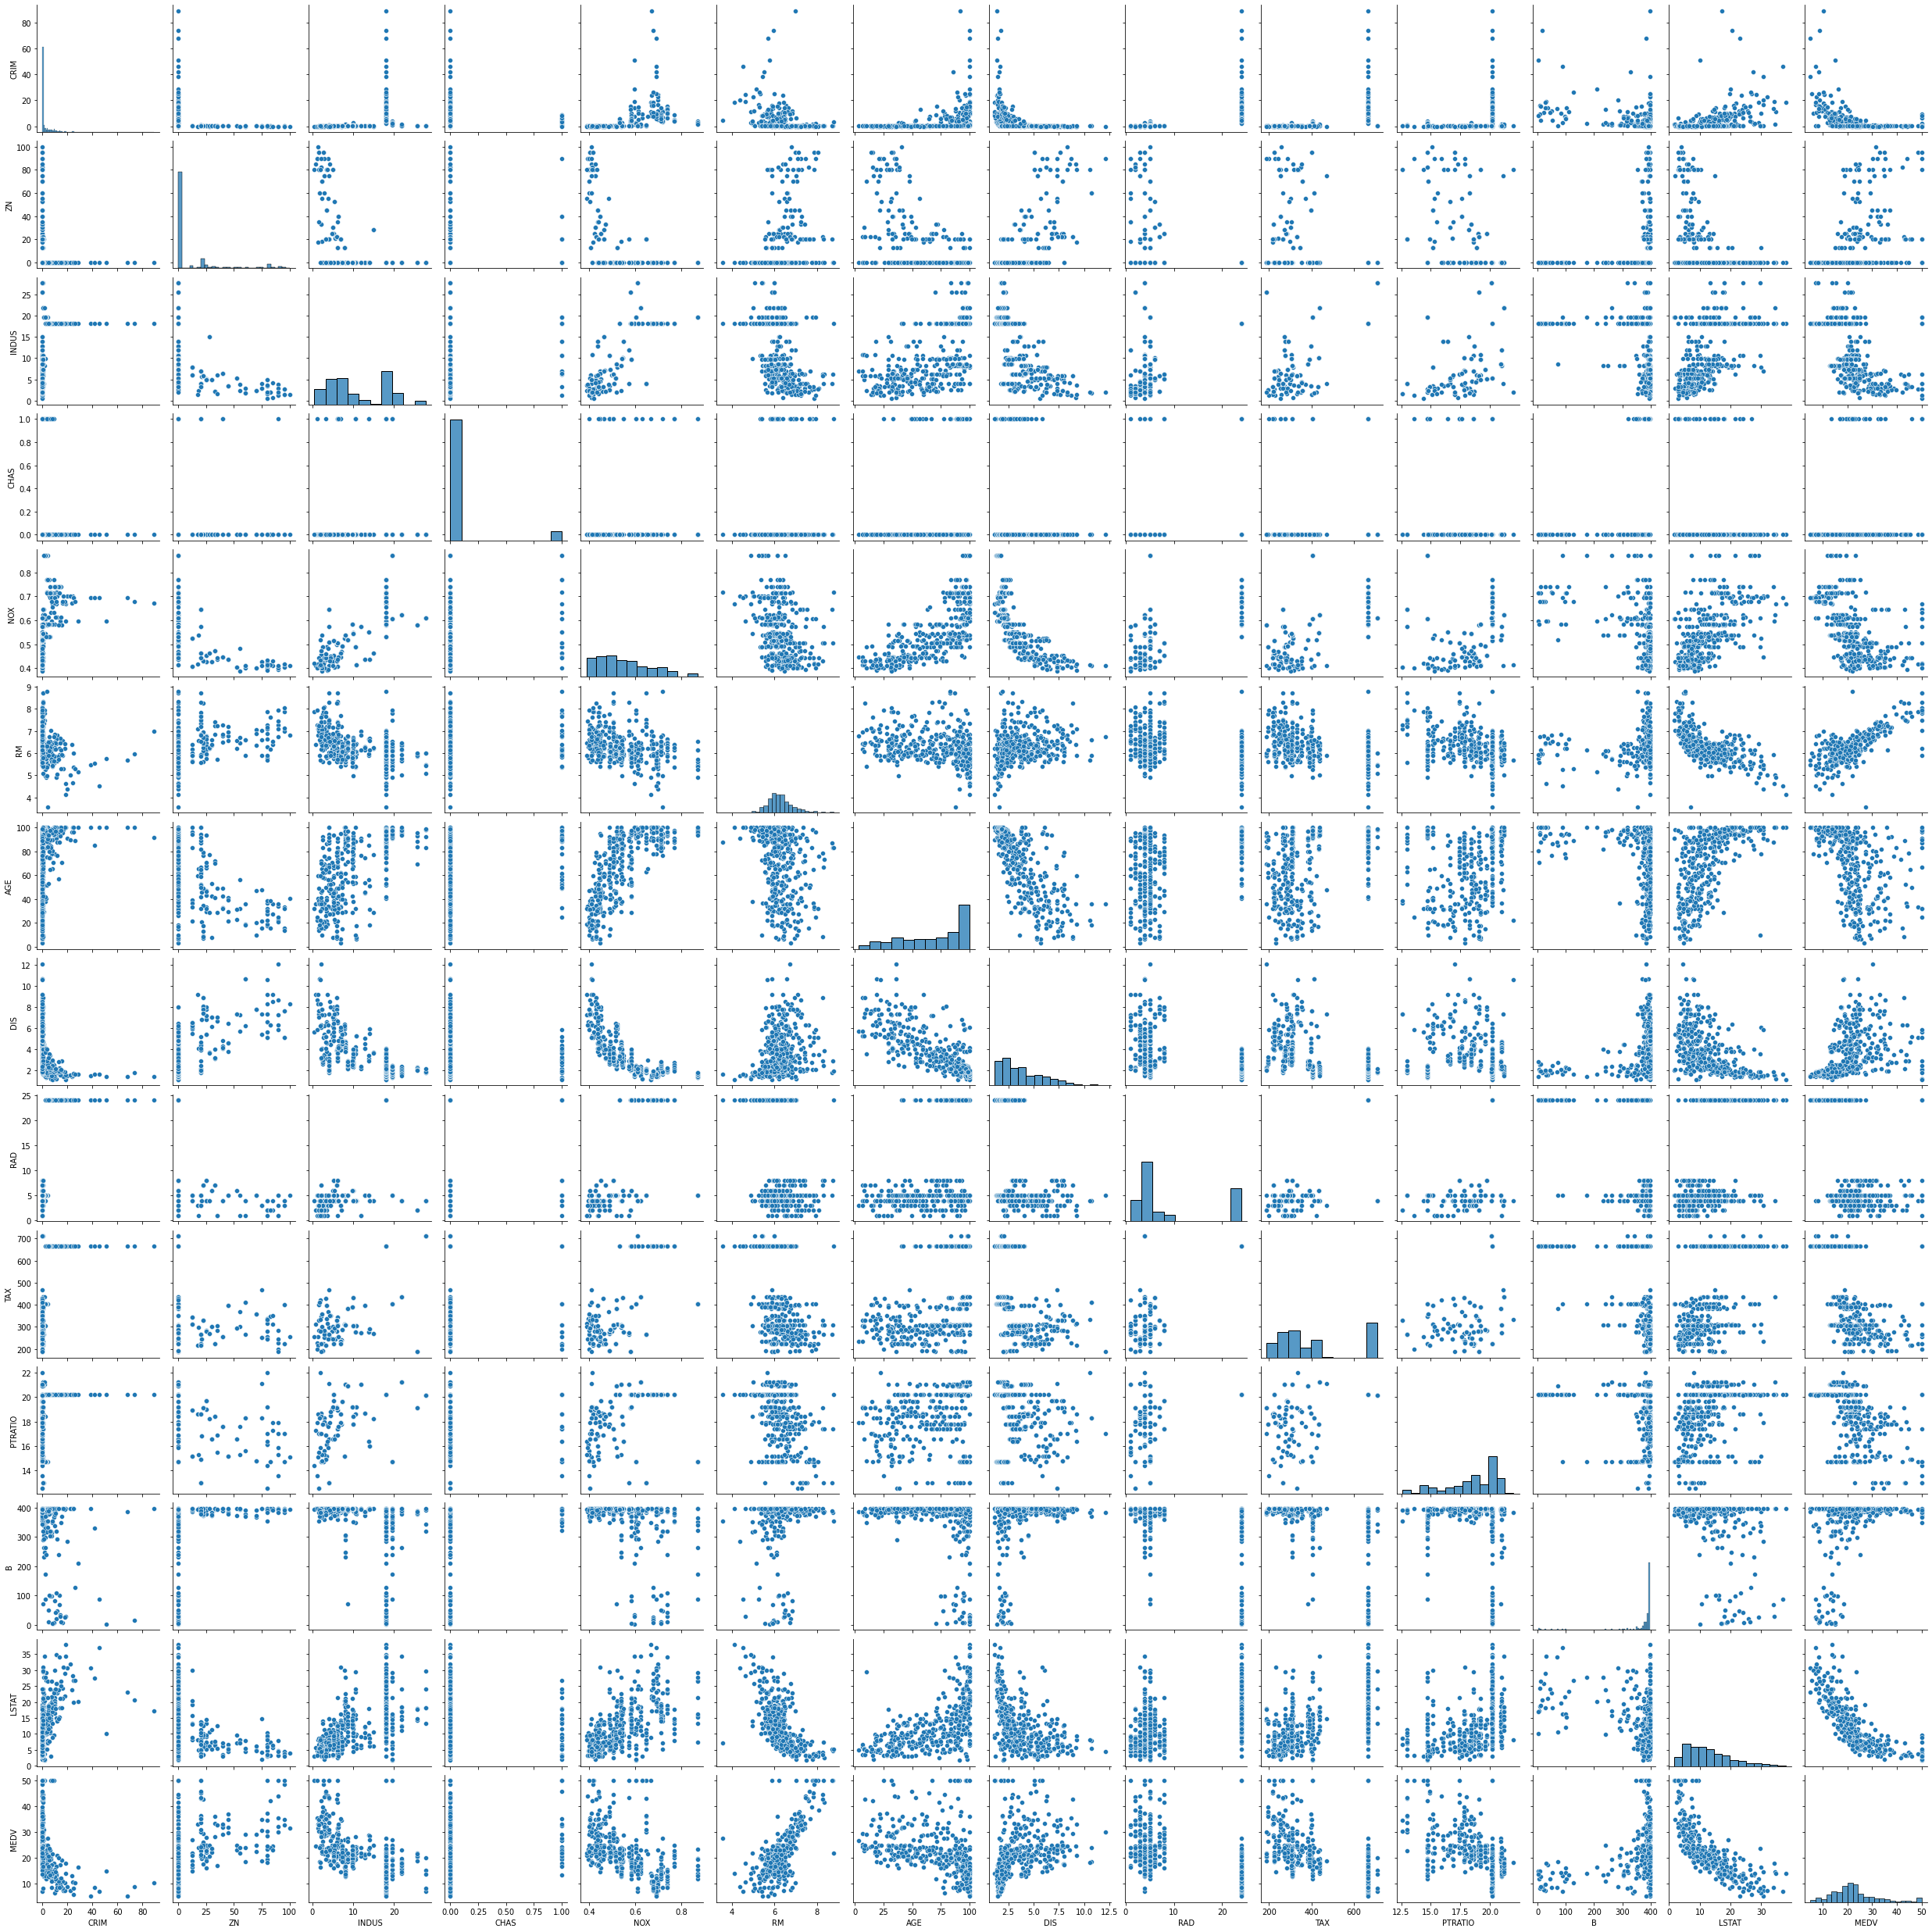

In [22]:
sns.pairplot(data)

<AxesSubplot: >

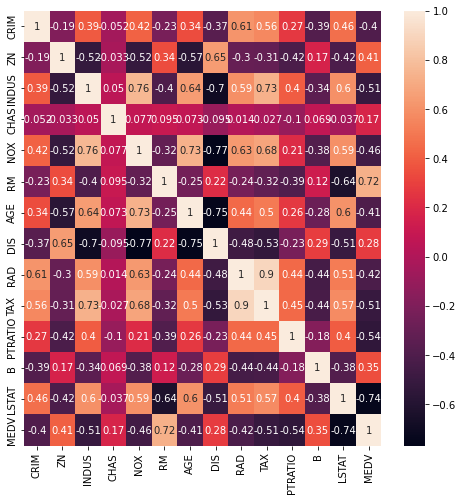

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)